# Introduction

Introduction details

In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
# read in the data 
df = pd.read_csv('bikeDetails.csv')
df.head(5)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


## Exploratory Data Analysis

In [60]:
# overall summaries of selling price
df['selling_price'].agg(['min', 'mean', 'median', 'max', 'std'])

min         5000.000000
mean       59638.151744
median     45000.000000
max       760000.000000
std        56304.291973
Name: selling_price, dtype: float64

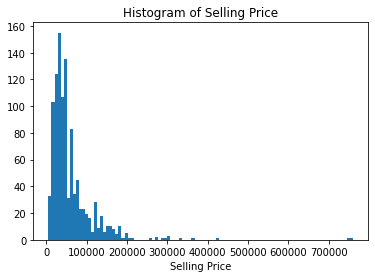

In [59]:
# histogram of selling price
plt.hist(df['selling_price'], bins = 100)
plt.title('Histogram of Selling Price')
plt.xlabel('Selling Price')
plt.show()
plt.close()

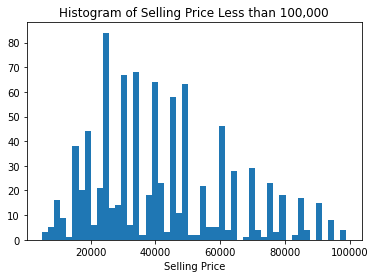

In [76]:
# histogram of selling price less than 100,000 to see the more common prices better
plt.hist(df[df['selling_price'] < 100000]['selling_price'], bins = 50)
plt.title('Histogram of Selling Price Less than 100,000')
plt.xlabel('Selling Price')
plt.show()
plt.close()

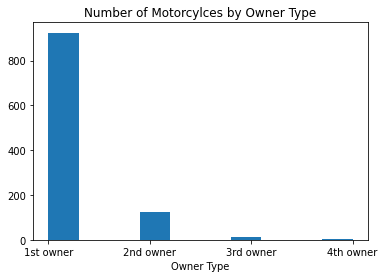

In [97]:
plt.hist(df['owner'])
plt.title('Number of Motorcylces by Owner Type')
plt.xlabel('Owner Type')
plt.show()
plt.close()

In [99]:
# two-way contingency table for owner and year
pd.crosstab(df['year'], df['owner'])

owner,1st owner,2nd owner,3rd owner,4th owner
year,,,,
1988,1,0,0,0
1991,1,0,0,0
1993,0,1,0,0
1995,0,0,1,0
1997,2,0,0,0
1998,2,0,1,0
1999,0,1,0,0
2000,4,0,1,1
2001,1,1,0,0


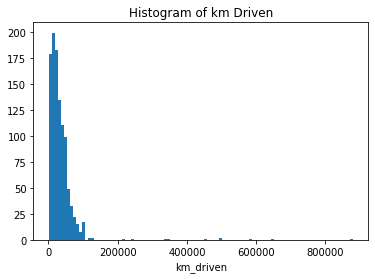

In [92]:
plt.hist(df['km_driven'], bins = 100)
plt.title('Histogram of km Driven')
plt.xlabel('km_driven')
plt.show()
plt.close()

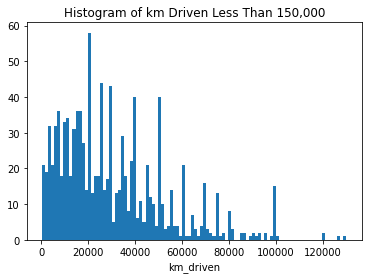

In [93]:
plt.hist(df[df['km_driven'] < 150000]['km_driven'], bins = 100)
plt.title('Histogram of km Driven Less Than 150,000')
plt.xlabel('km_driven')
plt.show()
plt.close()

## Loss Function

If we want to predict a value of **selling_price**, we need to figure out what a good prediction will be. This is typically done using a loss function. One of the common metrics is the root mean square error (RMSE) for our prediction (c) compared to our true values (y), which is the following equation:
$$
RMSE(c) = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-c)^2}
$$
In the different prediction methods, we want to find the prediction that minimizes this value. 

In [3]:
# calculate the RMSE for a list of predicted and actual y values
def rmse(predicted, actual):
    return sqrt(np.square(np.subtract(actual, predicted)).mean())

## Grid Search Algorithm

In [90]:
# create a grid of values for c based on previous exploratory analysis
grid = list(range(18000, 80250, 1))

# loop over the grid values and get the rmse for each
rmse_values = []
for c in grid:
    rmse_values.append(rmse(c, df['selling_price']))
    
# get the index of the smallest RMSE from the list 
min_index = rmse_values.index(min(rmse_values))

# get the value from the grid that has the smallest RMSE
print('Optimal value:', grid[min_index])

Optimal value: 59638


In [89]:
# run the algorithm for km_driven to see if this generalizes
# create a grid of values for c based on previous exploratory analysis
grid = list(range(0, 80000, 1))

rmse_values = []
for c in grid:
    rmse_values.append(rmse(c, df['km_driven']))
    
# get the index of the smallest RMSE from the list 
min_index = rmse_values.index(min(rmse_values))

# get the value from the grid that has the smallest RMSE
print('Optimal value:', grid[min_index])

Optimal value: 34360


## Gradient Descent Algorithm

### Difference Quotient

In [9]:
# difference quotient function
def diff_quot(predicted, actual, delta):
    return (rmse(predicted + delta, actual) - rmse(predicted, actual)) / delta

In [13]:
# use just the y's

# initialize values for the predicted value, delta, and step size
cur_c = 50000
delta = 0.005
step_size = 0.5

# cap the iterations at 2,000,000 so it doesn't possibly run forever
for _ in range(2000000):
    # calculate the difference quotient for the current predicted value
    diff_quotient = diff_quot(cur_c, df['selling_price'], delta)
    # create a new predicted value based on the difference quotient and step size
    new_c = cur_c - (diff_quotient * step_size)
    # see if the new value is enough of a change to update the predicted value
    if abs(new_c - cur_c) < 0.0001:
        # if this is true, update the value and stop the loop
        cur_c = new_c
        break
    # update the new value and continue with the loop
    cur_c = new_c
    
print('Optimal Value', cur_c)

Optimal Value 59626.89391984968


In [11]:
# initialize values for the predicted value, delta, and step size
cur_c = 50000
delta = 0.005
step_size = 0.5

# cap the iterations at 2,000,000 so it doesn't possibly run forever
for _ in range(2000000):
    # calculate the difference quotient for the current predicted value
    diff_quotient = diff_quot(cur_c, df['km_driven'], delta)
    # create a new predicted value based on the difference quotient and step size
    new_c = cur_c - (diff_quotient * step_size)
    # see if the new value is enough of a change to update the predicted value
    if abs(new_c - cur_c) < 0.0001:
        # if this is true, update the value and stop the loop
        cur_c = new_c
        break
    # update the new value and continue with the loop
    cur_c = new_c
    
print('Optimal Value', cur_c)

Optimal Value 34370.15023825297
